In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn

In [2]:
data = pd.read_csv('data/kyc_durations (1).csv')
data.head(2)

,CLIENT_ID,ADDRESS,ADDRESS2,INDUSTRY,POSITION,EMAIL,LN0_DISBURSMENT_DATE,SURVEY_DATE,SURVEY_WEEK,LAST_REPAYMENT_DATE,...,POSITION_DURATION,EMPLOYED_LENGTH_DURATION,BUSINESS_OWNERSHIP_DURATION,REFERENCES_DURATION,REFERENCE_RELATIONSHIP_DURATION,HEARD_ABOUT_US_DURATION,ALTERNATE_PHONE_NUMBER_DURATION,EMAIL_DURATION,TOTAL_DURATION,RNK
0,999999895,13th avenue McCarthy Hill,NaN,NaN,NaN,darkodiana021@gmail.com,2024-11-12 19:49:41.000,2024-11-12 13:53:17.000,2024-11-11,2024-11-14 18:49:45.000,...,NaN,NaN,5.0,43.0,14.0,11.0,NaN,10.0,174.0,1.0
1,999998034,KPAGURI DKM WAREHOUSE,XW 03295647,NaN,NaN,mumtorniaa@gmail.com,2024-03-22 16:40:25.000,2024-03-13 10:45:02.000,2024-03-11,2024-04-26 19:18:49.000,...,NaN,NaN,6.0,41.0,4.0,8.0,24.0,31.0,156.0,1.0


In [3]:
data['ADDRESS'] = data['ADDRESS'].str.lower()

In [4]:
data['add_dup'] = data.duplicated(subset=["SURVEY_WEEK", "ADDRESS"], keep=False).astype(int)

In [5]:
data.head(2)

,CLIENT_ID,ADDRESS,ADDRESS2,INDUSTRY,POSITION,EMAIL,LN0_DISBURSMENT_DATE,SURVEY_DATE,SURVEY_WEEK,LAST_REPAYMENT_DATE,...,EMPLOYED_LENGTH_DURATION,BUSINESS_OWNERSHIP_DURATION,REFERENCES_DURATION,REFERENCE_RELATIONSHIP_DURATION,HEARD_ABOUT_US_DURATION,ALTERNATE_PHONE_NUMBER_DURATION,EMAIL_DURATION,TOTAL_DURATION,RNK,add_dup
0,999999895,13th avenue mccarthy hill,NaN,NaN,NaN,darkodiana021@gmail.com,2024-11-12 19:49:41.000,2024-11-12 13:53:17.000,2024-11-11,2024-11-14 18:49:45.000,...,NaN,5.0,43.0,14.0,11.0,NaN,10.0,174.0,1.0,0
1,999998034,kpaguri dkm warehouse,XW 03295647,NaN,NaN,mumtorniaa@gmail.com,2024-03-22 16:40:25.000,2024-03-13 10:45:02.000,2024-03-11,2024-04-26 19:18:49.000,...,NaN,6.0,41.0,4.0,8.0,24.0,31.0,156.0,1.0,0


In [6]:
data['add_dup'].value_counts()

add_dup
0    284921
1    143218
Name: count, dtype: int64

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [8]:
df = data[data['DISBURSED'] == 1]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204599 entries, 0 to 428138
Data columns (total 42 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CLIENT_ID                        204599 non-null  int64  
 1   ADDRESS                          204490 non-null  object 
 2   ADDRESS2                         68236 non-null   object 
 3   INDUSTRY                         194381 non-null  object 
 4   POSITION                         194366 non-null  object 
 5   EMAIL                            152567 non-null  object 
 6   LN0_DISBURSMENT_DATE             204599 non-null  object 
 7   SURVEY_DATE                      204599 non-null  object 
 8   SURVEY_WEEK                      204599 non-null  object 
 9   LAST_REPAYMENT_DATE              171557 non-null  object 
 10  LAST_EXPECTED_REPAYMENT          204599 non-null  object 
 11  TOTAL_REPAYMENT_AMOUNT           171557 non-null  float64
 12  TOTAL_D

In [10]:
df.columns

Index(['CLIENT_ID', 'ADDRESS', 'ADDRESS2', 'INDUSTRY', 'POSITION', 'EMAIL',
       'LN0_DISBURSMENT_DATE', 'SURVEY_DATE', 'SURVEY_WEEK',
       'LAST_REPAYMENT_DATE', 'LAST_EXPECTED_REPAYMENT',
       'TOTAL_REPAYMENT_AMOUNT', 'TOTAL_DISBURSMENT_AMOUNT',
       'DAYS_FROM_FIRST_DUE_INSTALLMENT', 'DISB_DATE', 'DISBURSED', 'DR1',
       'DEFAULTED', 'PTFRAUD', 'USER_ID', 'CREATED_TIMESTAMP', 'VERSION',
       'MARITAL_STATUS_DURATION', 'ENROLLED_TO_SCHOOL_DURATION',
       'DEPENDENTS_DURATION', 'HOME_OWNER_DURATION',
       'SETTLEMENT_PERIOD_DURATION', 'PHYSICAL_DISABILITIES_DURATION',
       'MONTHLY_INCOME_DURATION', 'MAIN_INCOME_SOURCE_DURATION',
       'INDUSTRY_DURATION', 'POSITION_DURATION', 'EMPLOYED_LENGTH_DURATION',
       'BUSINESS_OWNERSHIP_DURATION', 'REFERENCES_DURATION',
       'REFERENCE_RELATIONSHIP_DURATION', 'HEARD_ABOUT_US_DURATION',
       'ALTERNATE_PHONE_NUMBER_DURATION', 'EMAIL_DURATION', 'TOTAL_DURATION',
       'RNK', 'add_dup'],
      dtype='object')

In [11]:
df = df[['add_dup', 'TOTAL_DURATION', 'DEFAULTED']]
df = df.dropna()

In [12]:
X = df[['add_dup', 'TOTAL_DURATION']]
y = df[['DEFAULTED']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     34563
           1       0.00      0.00      0.00       657

    accuracy                           0.98     35220
   macro avg       0.49      0.50      0.50     35220
weighted avg       0.96      0.98      0.97     35220


Confusion Matrix:
 [[34563     0]
 [  657     0]]


/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [15]:
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": log_reg.coef_[0]})
coef_df

,Feature,Coefficient
0,add_dup,-0.017119
1,TOTAL_DURATION,-0.004569


KYC Duration vs DR

In [16]:
import matplotlib.pyplot as plt

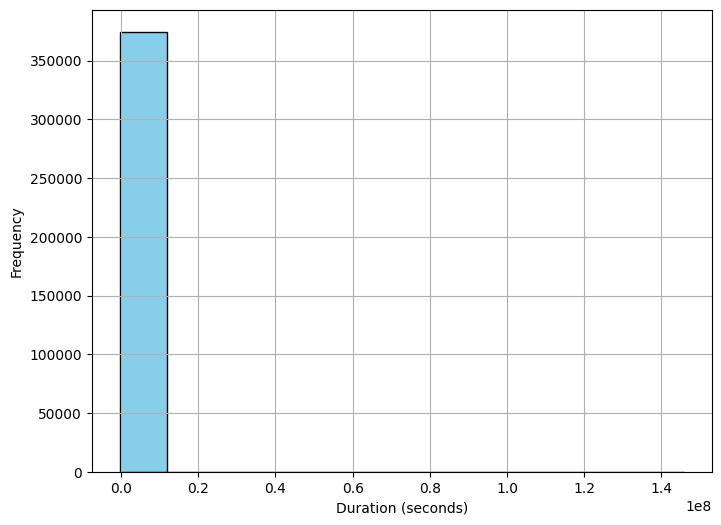

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(data['TOTAL_DURATION'], bins=12, edgecolor='black', color='skyblue')
# plt.title('Histogram of Duration to Business Name Answer')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:
dur = data[(data['TOTAL_DURATION'] > -258812) & (data['TOTAL_DURATION'] < 3000) & (data['DISBURSED'] == 1)]

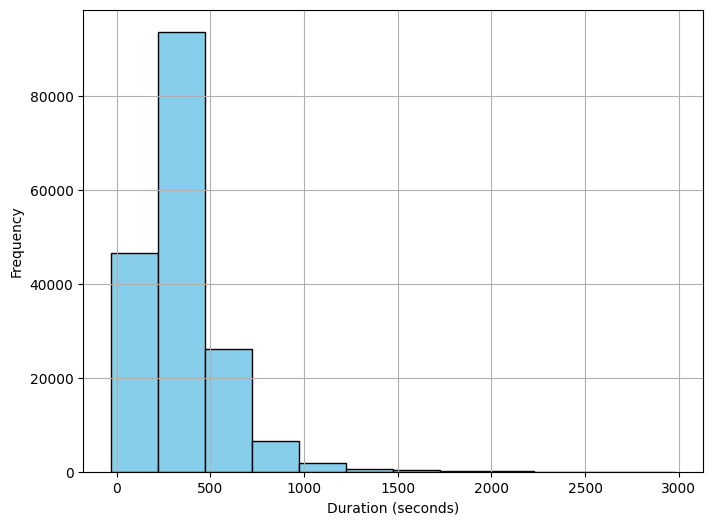

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(dur['TOTAL_DURATION'], bins=12, edgecolor='black', color='skyblue')
# plt.title('Histogram of Duration to Business Name Answer')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
duration_bins = [0, 100, 200,  300, 400,  500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
dur_labels = [f'{i}-{i+100} sec' for i in range(0, 2000, 100)]

dur['duration_bin'] = pd.cut(dur['TOTAL_DURATION'], bins=duration_bins, labels=dur_labels, right=False)

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_98855/4136896119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dur['duration_bin'] = pd.cut(dur['TOTAL_DURATION'], bins=duration_bins, labels=dur_labels, right=False)


In [21]:
bins = dur.groupby('duration_bin').agg(
    default_count=('DEFAULTED', 'sum'),
    total_count=('CLIENT_ID', 'count')
)
bins['dr1'] = bins['default_count'] / bins['total_count']
bins = bins.reset_index()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_98855/773318700.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bins = dur.groupby('duration_bin').agg(


In [22]:
bins

,duration_bin,default_count,total_count,dr1
0,0-100 sec,40,1845,0.021680
1,100-200 sec,661,33051,0.019999
2,200-300 sec,947,50549,0.018734
3,300-400 sec,717,37075,0.019339
4,400-500 sec,386,22462,0.017185
5,500-600 sec,217,12907,0.016813
6,600-700 sec,144,7231,0.019914
7,700-800 sec,68,4154,0.016370
8,800-900 sec,44,2483,0.017720
9,900-1000 sec,20,1453,0.013765


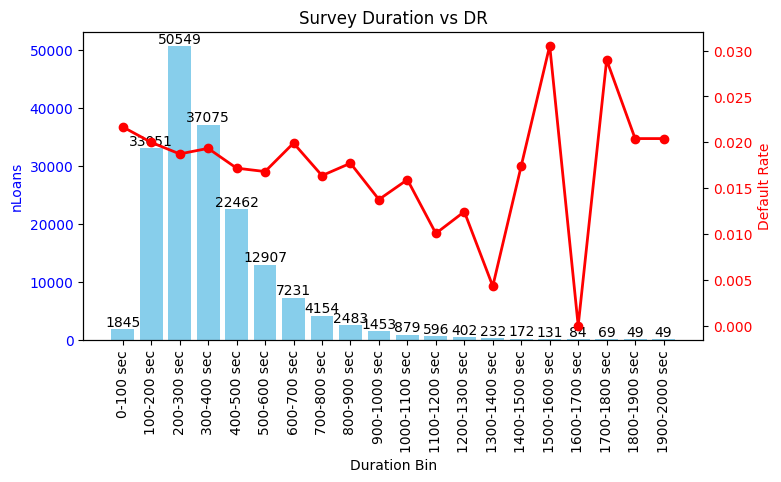

In [23]:
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(bins['duration_bin'], bins['total_count'], color='skyblue', label='Count')
ax1.set_xlabel('Duration Bin')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(range(len(bins['duration_bin'])))
ax1.set_xticklabels(bins['duration_bin'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(bins['duration_bin'],bins['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')

# Add a title
plt.title('Survey Duration vs DR')
plt.show()